# Negative exchange energy constant

In this tutorial, we show how to set up a negative value of exchange energy constant between subregions in the mesh. We start by importing the modules we are going to use. We import `random`, because we plan to initialise our magnetisation as a random state.

In [1]:
import random
import discretisedfield as df
import micromagneticmodel as mm
import oommfc as mc

In order to make sure we always have the same random state generated, we set up the seed.

In [2]:
random.seed(2)

Our sample consists of three identical magnetic layers, which are (for some reason) coupled antiferomagnetically.

In [3]:
p1 = (0, 0, 0)
p2 = (60e-9, 60e-9, 30e-9)
region = df.Region(p1=p1, p2=p2)
subregions={'r1': df.Region(p1=(0, 0, 0), p2=(100e-9, 100e-9, 10e-9)),
            'r2': df.Region(p1=(0, 0, 10e-9), p2=(100e-9, 100e-9, 20e-9)),
            'r3': df.Region(p1=(0, 0, 20e-9), p2=(100e-9, 100e-9, 30e-9))}
mesh = df.Mesh(region, n=(20, 20, 9), subregions=subregions)

mesh.k3d_subregions()

Output()

We use a dictionary to set up parameter $A$. For individual subregions, we use `r1`, `r2`, and `r3`, whereas to define $A$ between different subregions, we put a colon in dictionary key - for instance, `r1:r2`.

In [4]:
system = mm.System(name='negative_A')

A = 1e-12
Adict = {'r1': A, 'r2': A, 'r3': A, 'r1:r2': -A, 'r2:r3': -A}

system.energy = mm.Exchange(A=Adict) + mm.UniaxialAnisotropy(K=1e4, u=(1, 0, 0))

As we mentioned previously, we are going to initialise the system using a random state.

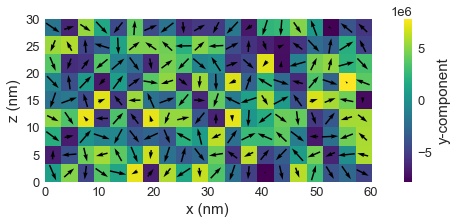

In [5]:
def m_random(point):
    return [2*random.random()-1 for i in range(3)]

system.m = df.Field(mesh, dim=3, value=m_random, norm=8e6)

system.m.plane('y').mpl(figsize=(12, 3))

Now, we can minimise the system's energy and plot its magnetisation.

Running OOMMF (ExeOOMMFRunner) [2020/07/02 13:23]... (1.8 s)


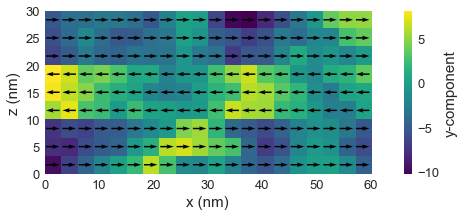

In [6]:
md = mc.MinDriver()
md.drive(system)

system.m.plane('y').mpl(figsize=(12, 3))

We can see that all three regions are uniformly magnetised, but mutually coupled antiferromagnetically.